# 🚫 WORK IN PROGRESS 🚫 Example of usage with price elasticity

## Load and process

First, the user has to load the framework and generate a process.

In [1]:
%matplotlib widget
from aeromaps import create_process
from aeromaps.core.models import (
    models_traffic,
    models_efficiency_top_down,
    models_energy_without_fuel_effect,
    models_offset,
    models_climate_simple_gwpstar,
    models_sustainability,
    models_energy_cost_simple,
    models_operation_cost_top_down,
    models_cost_feedback,
)

import gemseo as gm

gm.configure_logger()

<RootLogger root (INFO)>

In [2]:
models_traffic.pop("rpk")

models_operation_cost_top_down.pop("passenger_aircraft_total_cost_and_airfare")


models = {
    "models_traffic": models_traffic,
    "models_efficiency_top_down": models_efficiency_top_down,
    "models_energy_without_fuel_effect": models_energy_without_fuel_effect,
    "models_offset": models_offset,
    "models_climate_simple_gwpstar": models_climate_simple_gwpstar,
    "models_sustainability": models_sustainability,
    "models_energy_cost_simple": models_energy_cost_simple,
    "models_operation_cost_top_down": models_operation_cost_top_down,
    "models_cost_feedback": models_cost_feedback,
}

In [3]:
process = create_process(
    configuration_file="data_elasticity/config_elasticity.json",
    models=models,
)

<class 'float'> 0.0
<class 'float'> 0.0
<class 'float'> 0.0
<class 'int'> 2051
<class 'int'> 2051
<class 'int'> 2051
<class 'float'> 5.0
<class 'float'> 5.0
<class 'float'> 5.0
<class 'list'> []
<class 'list'> [3.0]
<class 'int'> 2020
<class 'float'> 66.0
<class 'int'> 2024
<class 'float'> 100.0
<class 'pandas.core.series.Series'> 2000    2.598200e+10
2001    2.615700e+10
2002    2.550700e+10
2003    2.656000e+10
2004    3.012200e+10
2005    3.185700e+10
2006    3.317900e+10
2007    3.493500e+10
2008    3.576900e+10
2009    3.486800e+10
2010    3.836600e+10
2011    4.044100e+10
2012    4.145400e+10
2013    4.274000e+10
2014    4.446000e+10
2015    4.670400e+10
2016    4.920400e+10
2017    5.158800e+10
2018    5.427900e+10
2019    5.619900e+10
2020             NaN
2021             NaN
2022             NaN
2023             NaN
2024             NaN
2025             NaN
2026             NaN
2027             NaN
2028             NaN
2029             NaN
2030             NaN
2031            

## Set up variables

### Aviation scenario

In [4]:
process.parameters.price_elasticity = -0.9

In [5]:
# Air traffic evolution

## Growth rate by category [%]
process.parameters.cagr_passenger_short_range_reference_periods = []
process.parameters.cagr_passenger_short_range_reference_periods_values = [3.0]
process.parameters.cagr_passenger_medium_range_reference_periods = []
process.parameters.cagr_passenger_medium_range_reference_periods_values = [3.0]
process.parameters.cagr_passenger_long_range_reference_periods = []
process.parameters.cagr_passenger_long_range_reference_periods_values = [3.0]
process.parameters.cagr_freight_reference_periods = []
process.parameters.cagr_freight_reference_periods_values = [3.0]

In [6]:
# Aircraft fleet and operation evolution - Aircraft load factor

## Aircraft load factor in 2050 [%]
process.parameters.load_factor_end_year = 89.0  # 2019 value: 82.399312

In [7]:
# Aircraft fleet and operation evolution - Operations

## Values for setting the logistic function
process.parameters.operations_final_gain = 8.0  # [%]
process.parameters.operations_start_year = 2025
process.parameters.operations_duration = 25.0

In [8]:
# Aircraft energy - Introduction of alternative drop-in fuels
import numpy as np

## Share of alternative fuels in the drop-in fuel mix (the rest being supplemented by kerosene) [%]
process.parameters.biofuel_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_share_reference_years_values = np.array([0.0, 0.0, 0.0, 0.0])
process.parameters.electrofuel_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.electrofuel_share_reference_years_values = np.array([0.0, 0.0, 0.0, 0.0])

In [9]:
# Various environmental settings

## Share of biofuel production pathways (the rest being completed by AtJ processes) [%]
process.parameters.biofuel_hefa_fog_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_hefa_fog_share_reference_years_values = [100, 0.7, 0.7, 0.7]
process.parameters.biofuel_hefa_others_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_hefa_others_share_reference_years_values = [0.0, 3.8, 3.8, 3.8]
process.parameters.biofuel_ft_others_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_ft_others_share_reference_years_values = [0.0, 76.3, 76.3, 76.3]
process.parameters.biofuel_ft_msw_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_ft_msw_share_reference_years_values = [0.0, 7.4, 7.4, 7.4]

## Emission factors for electricity (2019 value: 429 gCO2/kWh)
process.parameters.electricity_emission_factor_reference_years = [2020, 2030, 2040, 2050]
process.parameters.electricity_emission_factor_reference_years_values = [429.0, 180.0, 75.0, 30.0]

## Share of hydrogen production pathways (the rest being completed by production via coal without CCS) [%]
## Distribution in 2019: Gas without CCS (71%), Coal without CCS (27%), Electrolysis (2%), Others with CCS (0%), Co-products not taken into account
process.parameters.hydrogen_electrolysis_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.hydrogen_electrolysis_share_reference_years_values = [2, 50, 100, 100]
process.parameters.hydrogen_gas_ccs_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.hydrogen_gas_ccs_share_reference_years_values = [0, 0, 0, 0]
process.parameters.hydrogen_coal_ccs_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.hydrogen_coal_ccs_share_reference_years_values = [0, 0, 0, 0]
process.parameters.hydrogen_gas_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.hydrogen_gas_share_reference_years_values = [71, 50, 0, 0]

In [10]:
# Cost parameters

## Carbon tax
process.parameters.carbon_tax_reference_years = [2020, 2030, 2040, 2050]
process.parameters.carbon_tax_reference_years_values = [
    500,
    500,
    500,
    500,
]  # 2020 value differs from the value of Quinet (54 €/tCO2)

In [11]:
process.setup()
process.compute()

<class 'float'> 0.0
<class 'float'> 0.0
<class 'float'> 0.0
<class 'int'> 2051
<class 'int'> 2051
<class 'int'> 2051
<class 'float'> 5.0
<class 'float'> 5.0
<class 'float'> 5.0
<class 'list'> []
<class 'list'> [3.0]
<class 'int'> 2020
<class 'float'> 66.0
<class 'int'> 2024
<class 'float'> 100.0
<class 'pandas.core.series.Series'> 2000    2.598200e+10
2001    2.615700e+10
2002    2.550700e+10
2003    2.656000e+10
2004    3.012200e+10
2005    3.185700e+10
2006    3.317900e+10
2007    3.493500e+10
2008    3.576900e+10
2009    3.486800e+10
2010    3.836600e+10
2011    4.044100e+10
2012    4.145400e+10
2013    4.274000e+10
2014    4.446000e+10
2015    4.670400e+10
2016    4.920400e+10
2017    5.158800e+10
2018    5.427900e+10
2019    5.619900e+10
2020             NaN
2021             NaN
2022             NaN
2023             NaN
2024             NaN
2025             NaN
2026             NaN
2027             NaN
2028             NaN
2029             NaN
2030             NaN
2031            

    INFO - 14:21:37: MDAGaussSeidel running... Normed residual = 0.00e+00 (iter. 0)
/Users/a.salgas/PycharmProjects/AeroMAPS/aeromaps/core/process.py:556: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  self.data["vector_outputs"].to_dict("list")


### Sustainability assessment

In [12]:
rpk_with_elast = process.vector_outputs_df["rpk_long_range"]
rpk_no_elast = process.vector_outputs_df["rpk_long_range_no_elasticity"]

In [13]:
rpk_with_elast / rpk_no_elast

2000    1.000000
2001    1.000000
2002    1.000000
2003    1.000000
2004    1.000000
2005    1.000000
2006    1.000000
2007    1.000000
2008    1.000000
2009    1.000000
2010    1.000000
2011    1.000000
2012    1.000000
2013    1.000000
2014    1.000000
2015    1.000000
2016    1.000000
2017    1.000000
2018    1.000000
2019    1.000000
2020    1.000000
2021    1.000000
2022    1.000000
2023    1.000000
2024    1.000000
2025    0.700797
2026    0.708373
2027    0.715974
2028    0.723613
2029    0.731306
2030    0.739074
2031    0.747102
2032    0.755200
2033    0.763387
2034    0.771669
2035    0.780039
2036    0.788461
2037    0.796878
2038    0.805212
2039    0.813375
2040    0.821291
2041    0.828902
2042    0.836175
2043    0.843103
2044    0.849697
2045    0.855979
2046    0.861975
2047    0.867710
2048    0.873207
2049    0.878486
2050    0.883561
dtype: float64

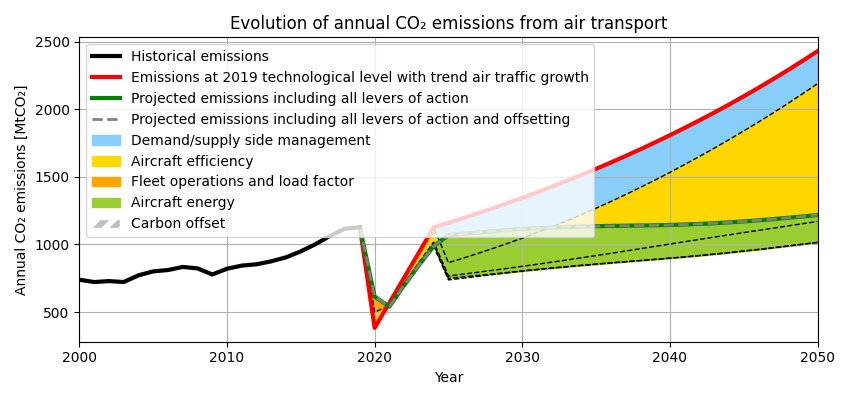

In [14]:
process.plot("air_transport_co2_emissions")

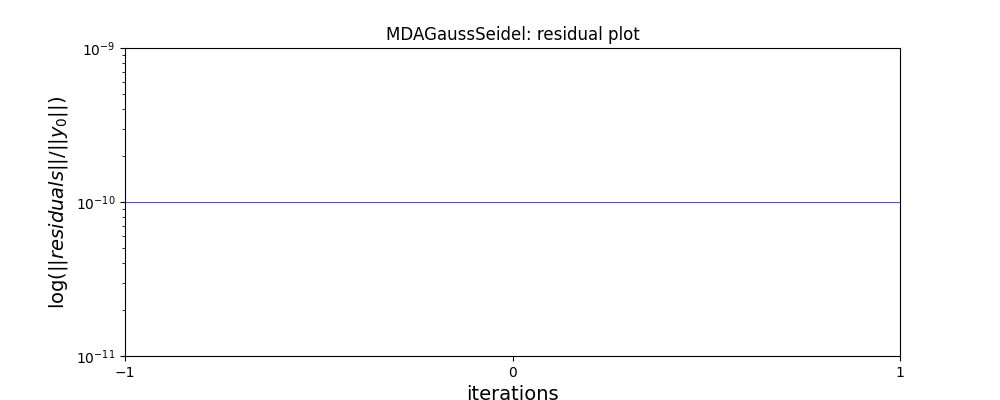

In [15]:
process.mda_chain.plot_residual_history(show=True, save=False, fig_size=(10.0, 4.0))